# <center> **<u>Scikit-Learn: Supervised Learning</u>**  </center>
<br><br>
<figure style="text-align: center;">
    <img src="notebook_images/scikit-learn_supervised_learning/supervised_learning.jpg" alt="Supervised Learning">
</figure>

---

#### All Imports

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, confusion_matrix, classification_report, roc_curve, roc_auc_score


# **1. Classification**

---

# **2. Regression**

---

### &nbsp;&nbsp;&nbsp;&nbsp; •**Pre-Exercise**

---

In [11]:
sales_adver_df = pd.read_csv('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/scikit-learn_supervised_learning/advertising_and_sales_clean.csv')
sales_adver_df.drop('influencer', axis=1, inplace=True)

## Regression Feature Creation

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

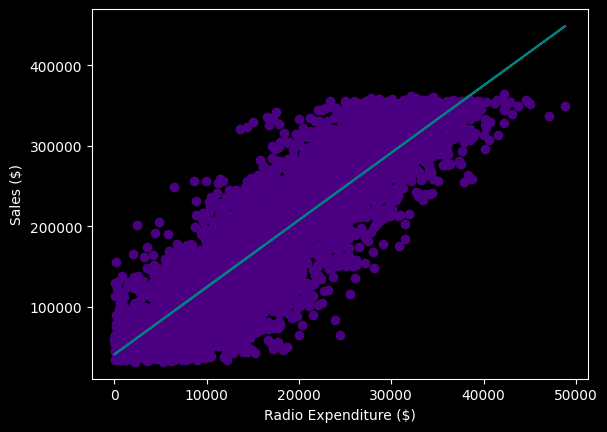

In [7]:
# scikit-learn imports used here
from sklearn.linear_model import LinearRegression

# assign `radio` column's values: X
X = sales_adver_df['radio'].values
# assign `sales` column values: y
y =sales_adver_df['sales'].values

# reshape X
X = X.reshape(-1, 1)


# instantiate LinearRegression model: linr
linr = LinearRegression()
# fit model `linr` to the data
linr.fit(X, y)
# make predictions: preds
preds = linr.predict(X)


# create scatterplot of `X` and `y` with `color='indigo'`
plt.scatter(X, y, color='indigo')

# create lineplot with `X` and `preds` with `color='teal'`, and include x and y labels
plt.plot(X, preds, color='teal')
plt.xlabel('Radio Expenditure ($)')
plt.ylabel('Sales ($)')

# show plot
plt.show()

## Linear Regression

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [22]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

# assign variables: X, y
X = sales_adver_df.drop('sales', axis=1).values
y = sales_adver_df['sales'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=69)


# instantiate LinearRegression model: lreg
lreg = LinearRegression()
# fit model
lreg.fit(X_train, y_train)
# make predictions: y_pred
y_pred = lreg.predict(X_test)

# print predictions and actual values
print('Predictions: {}; Actual: {}'.format(y_pred[:2], y_test[:2]))


# compute R-Squared: r_sq
r_sq = lreg.score(X_test, y_test)
# compute RMSE: rmse
rmse = root_mean_squared_error(y_test, y_pred)

# print metrics
print('R^2: {}'.format(r_sq))
print('RMSE: {}'.format(rmse))

Predictions: [227836.78136956 106709.77106839]; Actual: [226508.12 106471.53]
R^2: 0.9989613048989213
RMSE: 3031.704428862677


## K-Fold Validation

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [23]:
# scikit-learn imports used here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# assign variables: X, y
X = sales_adver_df.drop('sales', axis=1).values
y = sales_adver_df['sales'].values


# create KFold object with `n_splits=7`: kf
kf = KFold(n_splits=7, shuffle=True, random_state=33)
# instantiate LinearRegression: lr_kf
lr_kf = LinearRegression()

# compute 7-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lr_kf, X, y, cv=kf)

# print `cv_scores`
print(cv_scores)
# print `cv_scores`mean
print(f'Mean: {np.mean(cv_scores)}')
# print `cv_scores` standard deviation
print(f'Standard Deviation: {np.std(cv_scores)}')
# print `cv_scores` 95% confidence interval
print(f'95% CI: {np.quantile(cv_scores, [0.25, 0.975])}')

[0.99899013 0.99899363 0.99898552 0.99895264 0.99899417 0.99896127
 0.99906399]
Mean: 0.9989916217042066
Standard Deviation: 3.322681829782428e-05
95% CI: [0.9989734  0.99905352]


## Ridge

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [25]:
# scikit-learn imports here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# assign variables: X, y
X = sales_adver_df.drop('sales', axis=1).values
y = sales_adver_df['sales'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=333)

# define lists: alphas; ridge_scores
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []

# loop through alphas, instantiating Ridge with each alpha: ridge
for alpha in alphas:
    ridge = Ridge(alpha)
    #fit model
    ridge.fit(X_train, y_train)

    # calculate R^2: r2_score
    r2_score = ridge.score(X_test, y_test)
    # append `r2_score` to `ridge_scores`
    ridge_scores.append(r2_score)

# print `ridge_scores`
print(ridge_scores)

[0.9989686539164704, 0.998968653916472, 0.9989686539164888, 0.9989686539166561, 0.9989686539183297, 0.9989686539350652]


## Lasso

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

[ 3.56051482e+00 -8.16805954e-04  6.73399304e-03]


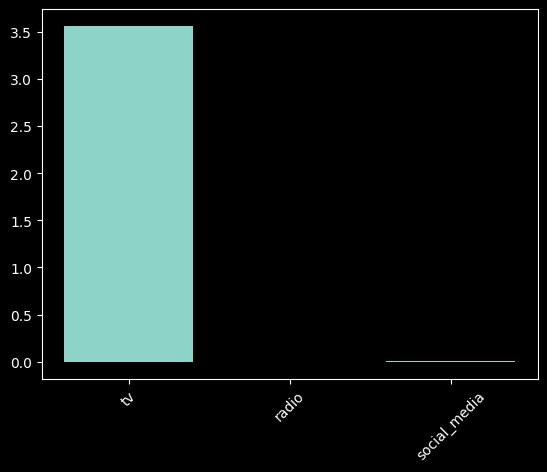

In [32]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# assign variables: X, y
X = sales_adver_df.drop('sales', axis=1).values
y = sales_adver_df['sales'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)


# instantiate Lasso with `alpha=0.42`: lasso
lasso = Lasso(alpha=0.42)
# fit model
lasso.fit(X_train, y_train)


# compute and print lasso coefficients: lasso_coef
lasso_coef = lasso.coef_
print(lasso_coef)

# define list of columns: sales_cols
sales_cols = list(sales_adver_df.drop('sales', axis=1))
#create barplot from `sales_col` and `lasso_coef` with `.xticks(rotation=45)` and show plot
plt.bar(sales_cols, lasso_coef)
plt.xticks(rotation=45)
plt.show()

# **3. Fine-Tuning**

---

## Prediction Classifiers

### &nbsp;&nbsp;&nbsp;&nbsp; •**Pre-Exercise**

---

In [35]:
diab_df = pd.read_csv('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/scikit-learn_supervised_learning/diabetes_clean.csv')

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [38]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# assign variables: X, y
X = diab_df.drop('diabetes', axis=1).values
y = diab_df['diabetes'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=777)


# instantiate KNeighborsClassifier with `n_neighbors=8`: knn_cm
knn = KNeighborsClassifier(n_neighbors=8)
# fit model
knn.fit(X_train, y_train)
# make predications: y_pred_cm
y_pred = knn.predict(X_test)


# print confusion matrix and classificatin report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[125  14]
 [ 31  30]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       139
           1       0.68      0.49      0.57        61

    accuracy                           0.78       200
   macro avg       0.74      0.70      0.71       200
weighted avg       0.76      0.78      0.76       200



## Logistic Regression

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

[0.343772   0.23372998 0.93677428 0.3190574  0.25416713 0.26545981
 0.32794897 0.1942066  0.12349005 0.69840745]


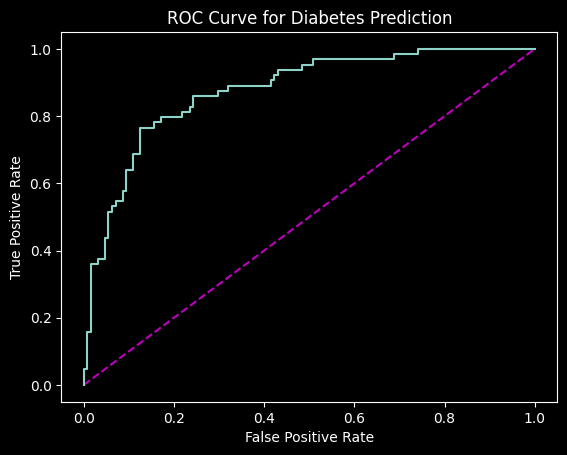

0.875732421875
[[116  12]
 [ 23  41]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       128
           1       0.77      0.64      0.70        64

    accuracy                           0.82       192
   macro avg       0.80      0.77      0.78       192
weighted avg       0.81      0.82      0.81       192



In [52]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

# assign variables: X, y
X = diab_df.drop('diabetes', axis=1).values
y = diab_df['diabetes'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34)

# instantiate LogisticRegression with `max_iter=333`: logr
logr = LogisticRegression(max_iter=333)
# fit model
logr.fit(X_train, y_train)
# make predictions: y_pred
y_pred = logr.predict(X_test)
# predict probabilities: y_pred_probs
y_pred_probs = logr.predict_proba(X_test)[:, 1]

# print `y_pred_probs[:10]`
print(y_pred_probs[:10])


# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# plot comparison line with `m--` (magenta dashed line)
plt.plot([0, 1], [0, 1], 'm--')
# plot fpr v, tpr with `x.label()`, `y.label()`, and `title()` and show plot
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

# print ROC accuracy score, confusion matrix, and classification report
print(roc_auc_score(y_test, y_pred_probs))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Hyperparameter Tuning

### GridSearchCV

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [74]:
# scikit-learn imports used here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, GridSearchCV

# assign variables: X, y
X = diab_df.drop('diabetes', axis=1).values
y = diab_df['diabetes'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

# instantiate KFold with `n_splits=9`: kf
kf = KFold(n_splits=5, shuffle=True, random_state=3)
# set up parameter grid for `alpha`: param_grid
param_grid = {'alpha': np.linspace(.00001, 1, 42)}
# instantiate Lasso: lasso
lasso = Lasso()
# instantiate GridSearchCV with `lasso`, `param_grid`, and `cv=kf`: lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)
# fit model
lasso_cv.fit(X_train, y_train)

# print best parameters and best score
print(f'Tuned Lasso Parameters: {lasso_cv.best_params_}')
print(f'Tuned Lasso Score: {lasso_cv.best_score_}')

Tuned Lasso Parameters: {'alpha': np.float64(1e-05)}
Tuned Lasso Score: 0.2816155042461044


# RandomizedSearchCV

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [80]:
# scikit-learn imports here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,  RandomizedSearchCV

# assign variables: X, y
X = diab_df.drop('diabetes', axis=1).values
y = diab_df['diabetes'].values

# make train/test sets: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

# instantiate KFold with `n_splits=9`: kf
kf = KFold(n_splits=5, shuffle=True, random_state=3)
# create parameter space: params
params = {'l1_ratio': [1],
          'tol': np.linspace(0.001, 1.0, 69),
          'C': np.linspace(0.01, 1.0, 69),
          'class_weight': ['balanced', {0: 0.8, 1: 0.2}],
          'max_iter': [333],
        'solver': ['liblinear']}

# instantiate LogisticRegression: logreg
logreg = LogisticRegression()
# instantiate RandomizedSearchCV with `logreg`, `params`, and `cv=kf`: logreg_cv
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)
# fit model
logreg_cv.fit(X_train, y_train)


# # print best parameters and best score
print(f'Tuned Lasso Parameters: {logreg_cv.best_params_}')
print(f'Tuned Lasso Score: {logreg_cv.best_score_}')

Tuned Lasso Parameters: {'tol': np.float64(0.10383823529411765), 'solver': 'liblinear', 'max_iter': 333, 'l1_ratio': 1, 'class_weight': 'balanced', 'C': np.float64(0.8107352941176471)}
Tuned Lasso Score: 0.7673163418290855


# **4. Preprocessing and Pipelines**

---

### &nbsp;&nbsp;&nbsp;&nbsp; •**Pre-Exercise**

---

In [114]:
music_df = pd.read_csv('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/scikit-learn_supervised_learning/Music/music_clean.csv')
genres = pd.read_csv('~/000_Duckspace/Learning/DataScience/Python_DataScience_Examples/data/scikit-learn_supervised_learning/Music/genres.csv')
music_df['genre'] = genres
music_df = music_df.iloc[:, 1:]

## Creating Dummy Variables

### &nbsp;&nbsp;&nbsp;&nbsp; •**Exercise**

---

In [146]:
# scikit-learn imports used here
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge

# create `music_df` with dummy values: music_df_dum, and print shape
music_df_dum = pd.get_dummies(music_df, drop_first=True)
print(f'`music_df_dum` is shaped:  {music_df_dum.shape}')

# create variables: X, y
X = music_df_dum.drop('popularity', axis=1).values
y = music_df_dum['popularity'].values


# instantiate KFold with `n_splits=7`: kf
kf = KFold(n_splits=7, shuffle=True, random_state=789)
# instantiate Ridge with `alpha=0.222`: ridge
ridge = Ridge(alpha=0.222)


# perform cross-validation: scores
scores = cross_val_score(ridge, X, y, cv=kf, scoring='neg_mean_squared_error')
# calculate RMSE, converting scores to positives: rmse
rmse = np.sqrt(-scores)

# print average RMSE and standard deviation of target array
print(f'Average RMSE:  {np.mean(rmse)}')
print(f'Standard Deviation of Target Array:  {np.std(y)}')

`music_df_dum` is shaped:  (1000, 20)
Average RMSE:  12.577161686498476
Standard Deviation of Target Array:  14.02156909907019
